In [1]:
#Importing required modules
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import datetime as dt
from pandas.tools.plotting import scatter_matrix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Importing Python datacube
mta = np.load('MTA_Fare.npy')

In [3]:
#Validating type of data
type(mta)

numpy.ndarray

In [4]:
#Getting the size of the numpy 3d array
mta.shape

(600L, 23L, 194L)

In [5]:
#Printing the array
mta

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [6]:
#Converting values to floats
mta = mta.astype('float')

In [7]:
#Replacing each -1 value with NaNs
mta[mta==-1]=['NaN']

In [8]:
#Printing the array
mta

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [9]:
#Creating a list with the type of MTA Cards 
ridetype = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud']

In [10]:
#Validating the type of the list
type(ridetype)

list

In [11]:
# Adding all values in the cube on the subway station axis with Numpy NaN
mta_allsum = np.nansum(mta, axis=0)

In [12]:
# creating a Panda dataframe with the new array and transposing it
mta_allsumdf = pd.DataFrame(mta_allsum).transpose()

In [13]:
#Setting the values of the new Dataframe with the list of type of MTA Cards
mta_allsumdf.columns = ridetype

In [14]:
#Validating the size of the new dataframe
mta_allsumdf.shape

(194, 23)

In [15]:
#Creating a Datetime index for the new dataframe
rng = pd.date_range('05/21/2010', periods=194, freq='W')

In [16]:
#Passing the new index to the dataframe
mta_allsumdf1 = mta_allsumdf.set_index(rng)

In [17]:
#Validating the head of resulting dataframe
mta_allsumdf1.head()

10t     14d     1d      2t    30d       7d      ada   afas  \
2010-05-23  11494615  530524  47801  186551  46808  3697443  8551937  10063   
2010-05-30  12526859  583533  51486  199229  64353  3981808  9486394  11847   
2010-06-06  12766627  586194  51636  199668  56994  4033030  9476538  12277   
2010-06-13  12653675  562602  52063  196389  37429  4032753  9450081  11221   
2010-06-20  12809694  548858  51153  194883  35210  3925446  9294002  10515   

               exp      ez  ...    month     rfm     rr    sen  spec    tcmc  \
2010-05-23  333197  512032  ...   123134  790110  59809  28221     0  124693   
2010-05-30  282755  578023  ...   151948  908068  69209  32333     0  121713   
2010-06-06  302028  615537  ...   151538  914124  69574  32618     0  122181   
2010-06-13  305513  606270  ...   147094  902549  68099  32404     0  122051   
2010-06-20  335780  563446  ...   137888  855573  66377  31933   176  119776   

                t  umlim  xbus  stud  
2010-05-23  21060   6128   358     0  
2010-05-30  21670   6120   474     0  
2010-06-06  21433   6490   465     0  
2010-06-13  21630   6590   484     0  
2010-06-20  20297   6313   452     0  

[5 rows x 23 columns]

C:\Users\juanpablo\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


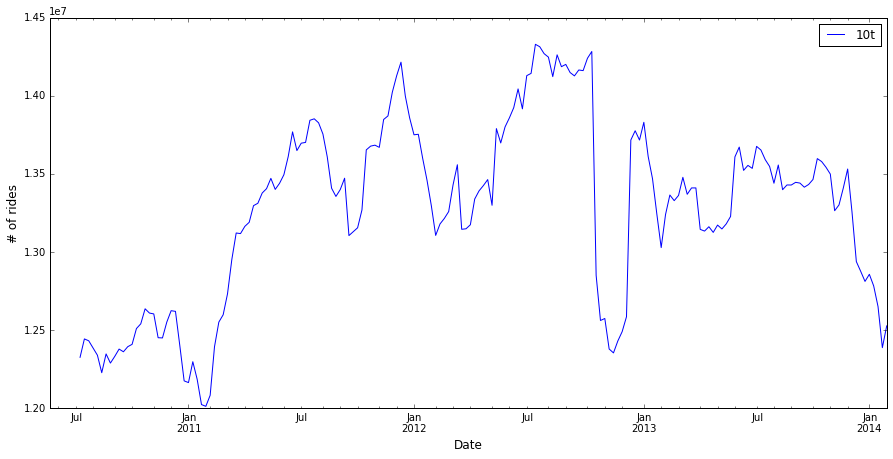

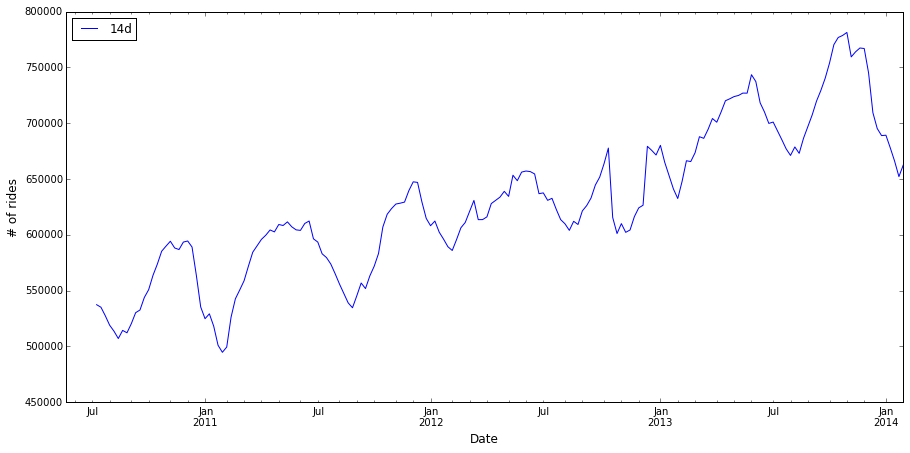

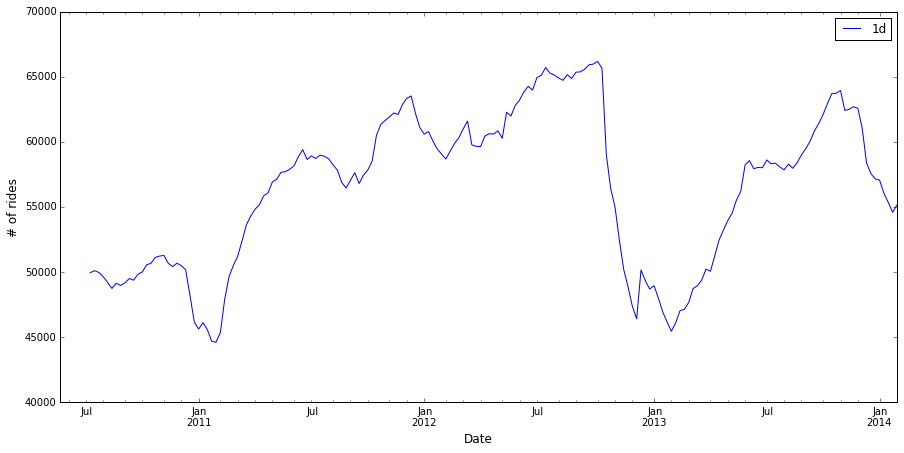

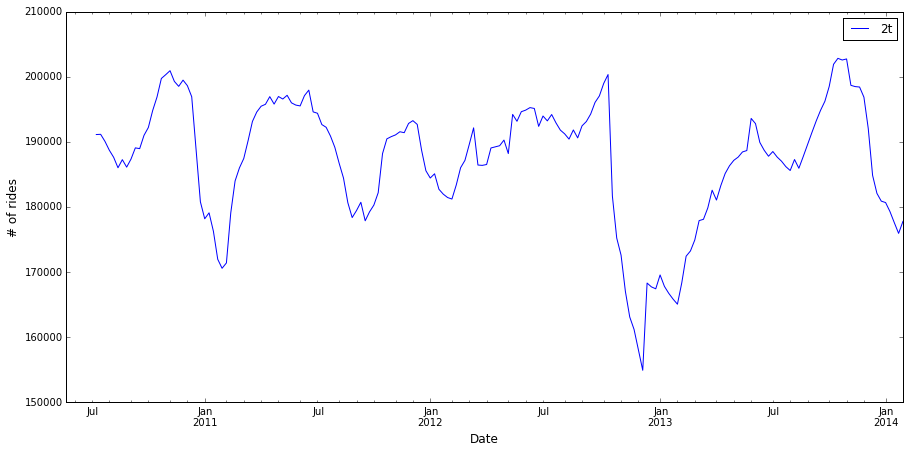

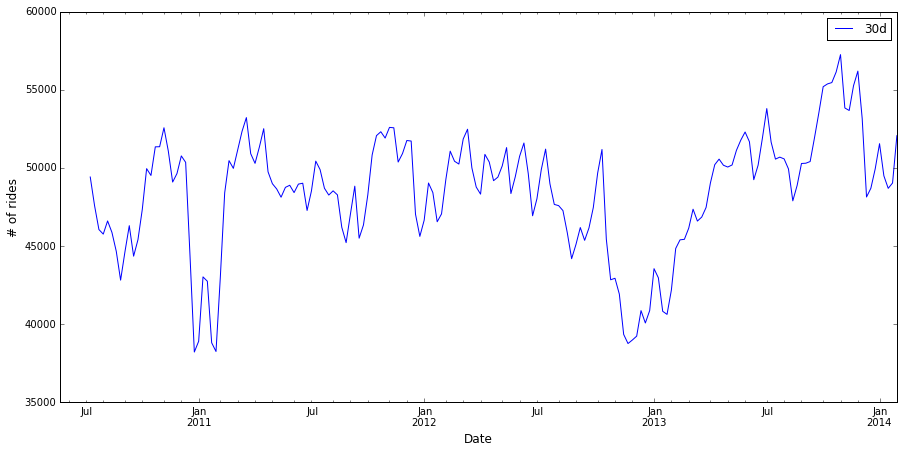

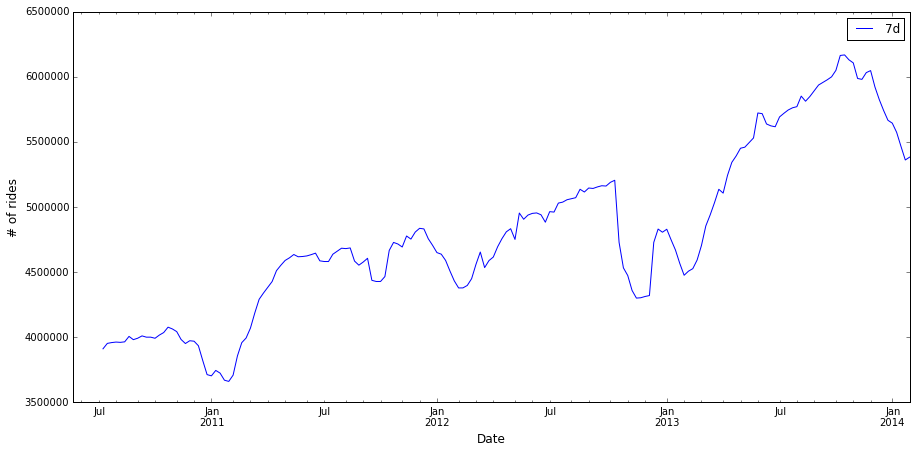

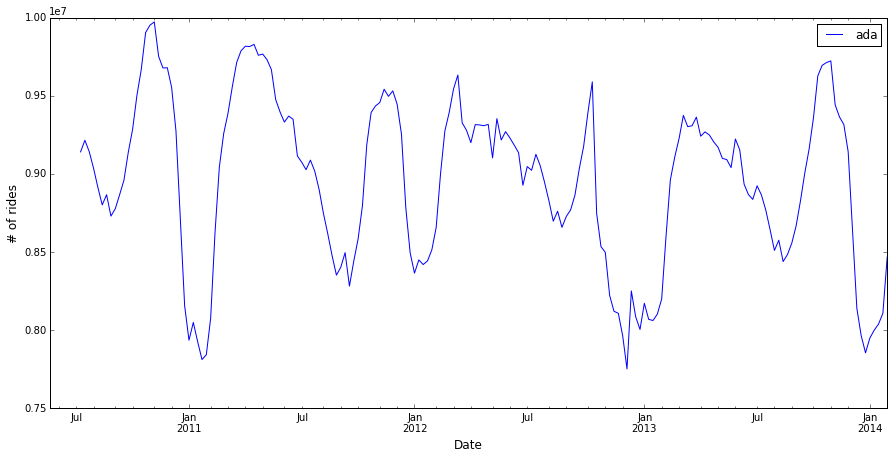

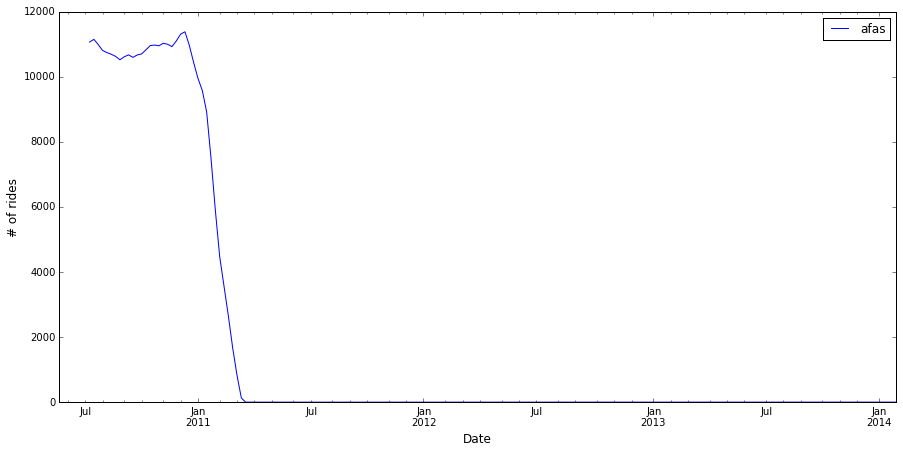

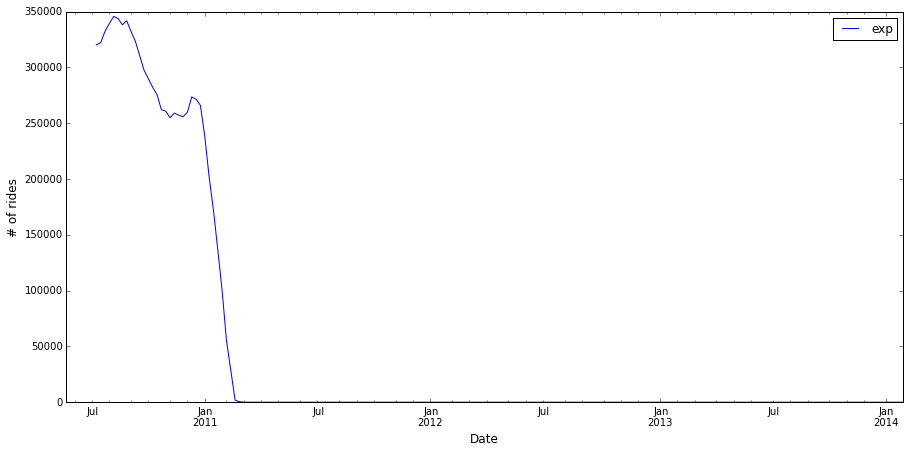

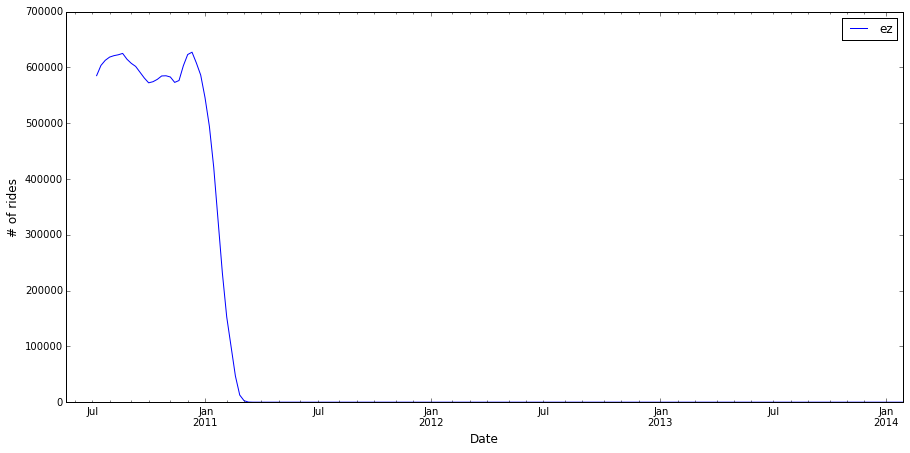

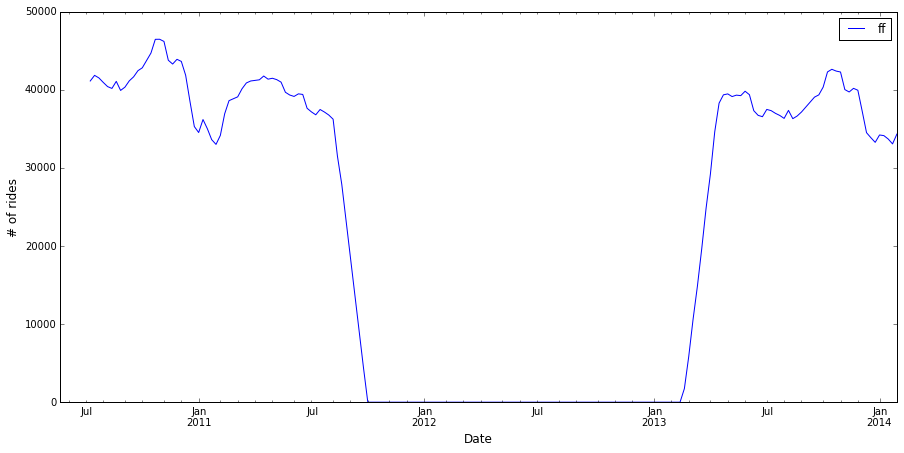

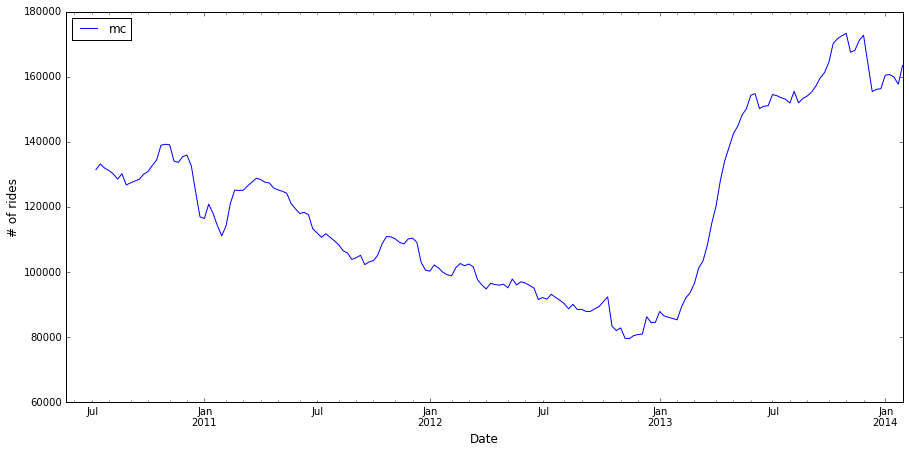

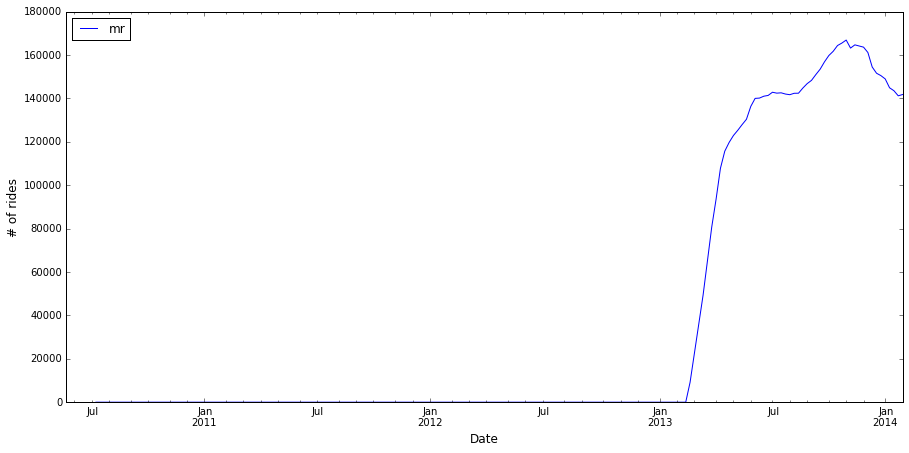

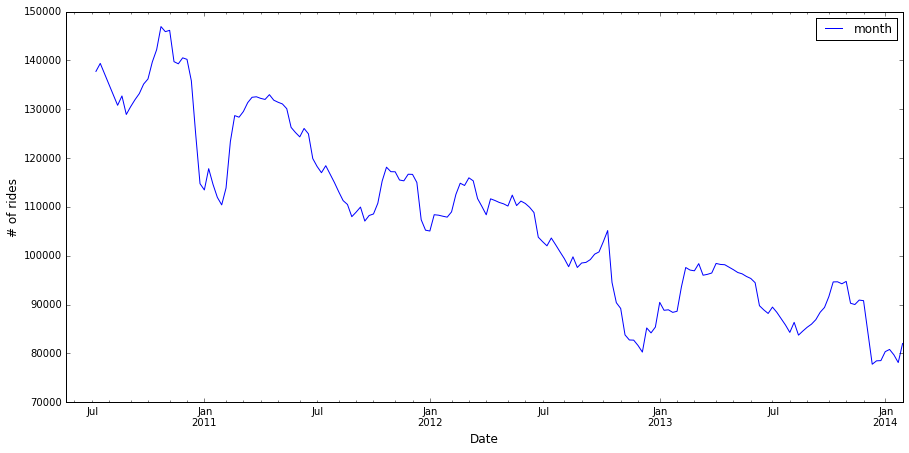

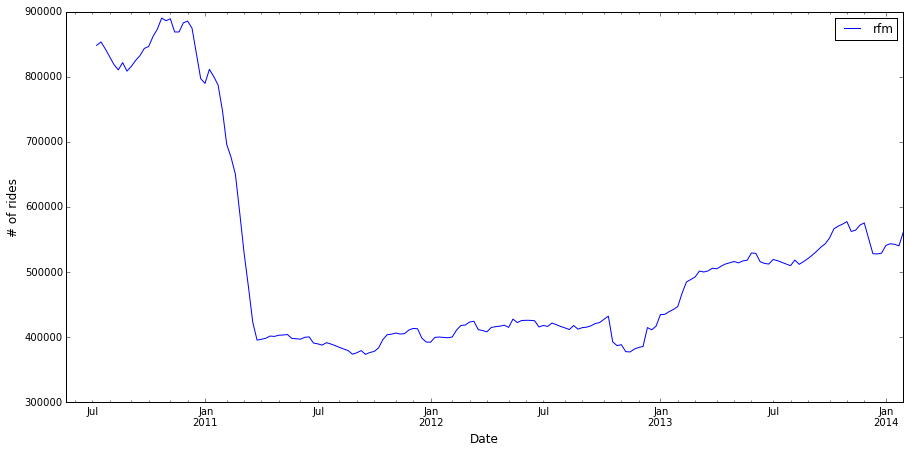

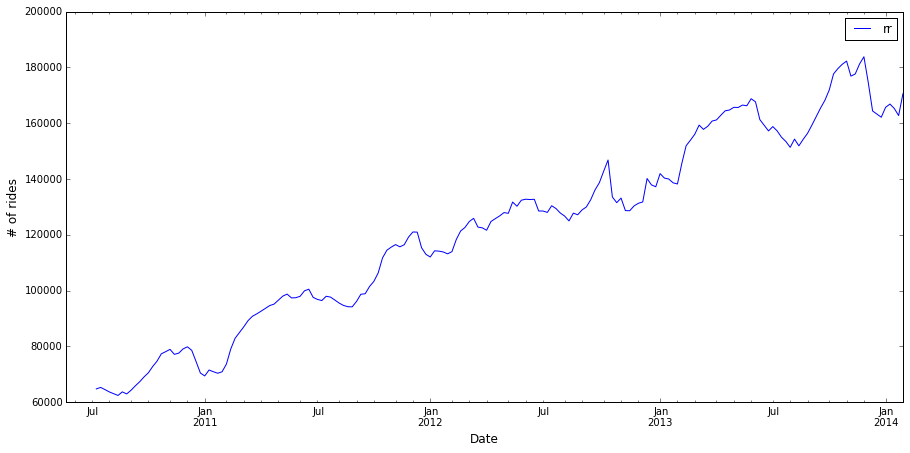

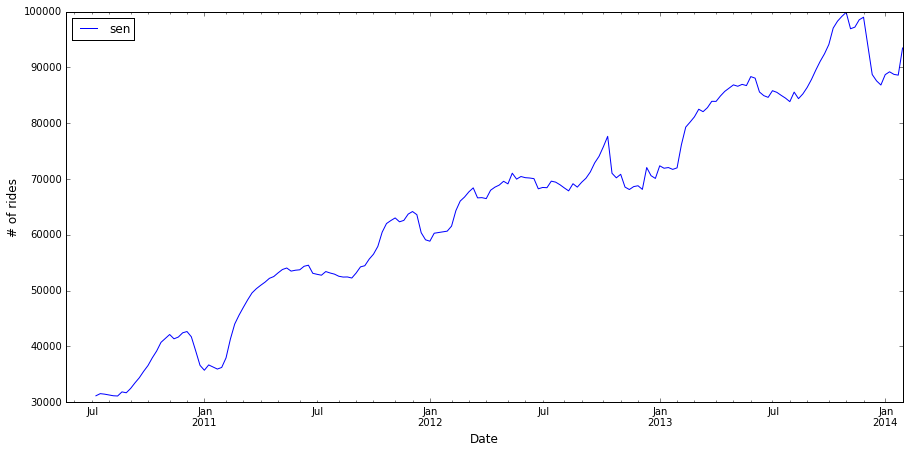

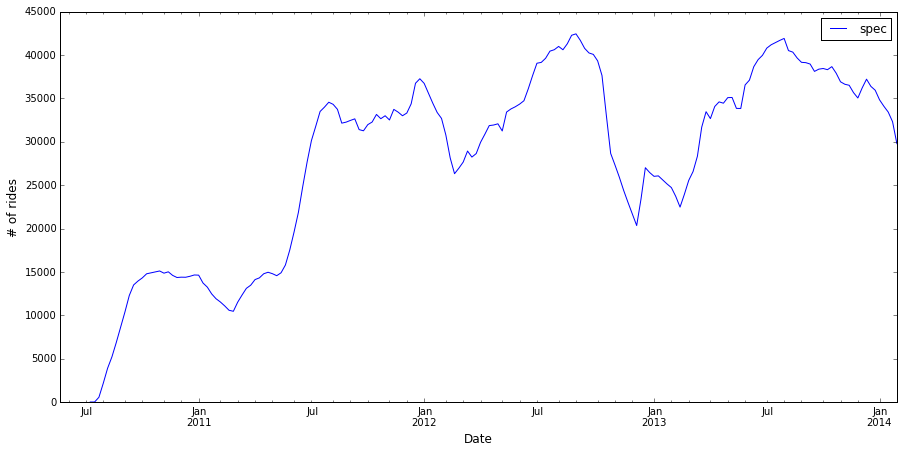

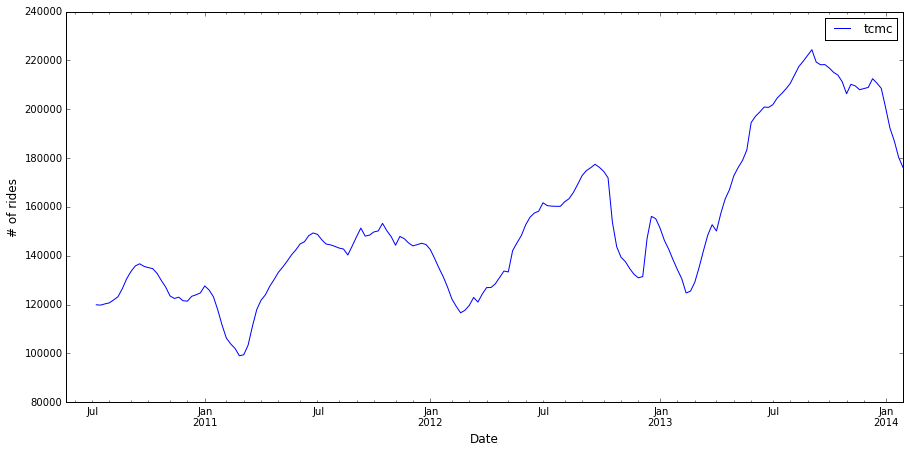

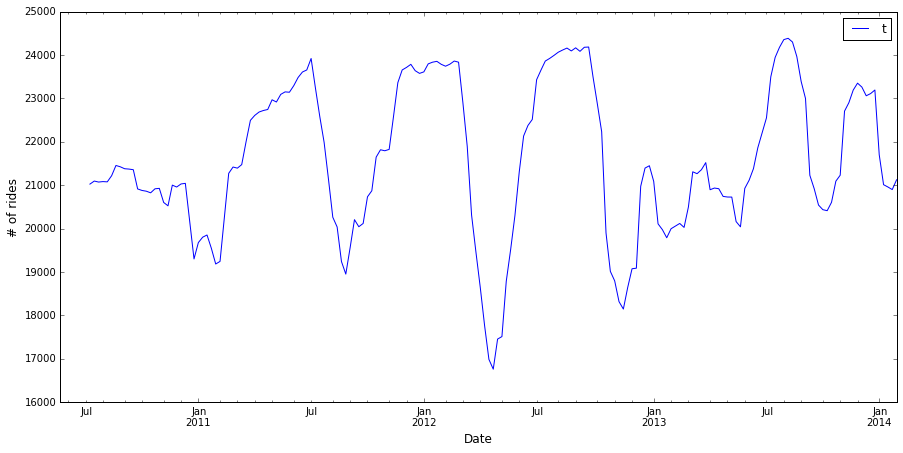

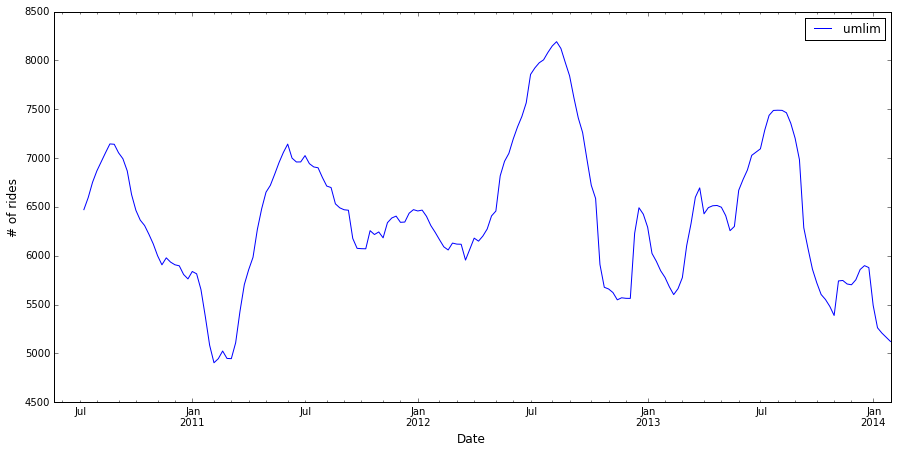

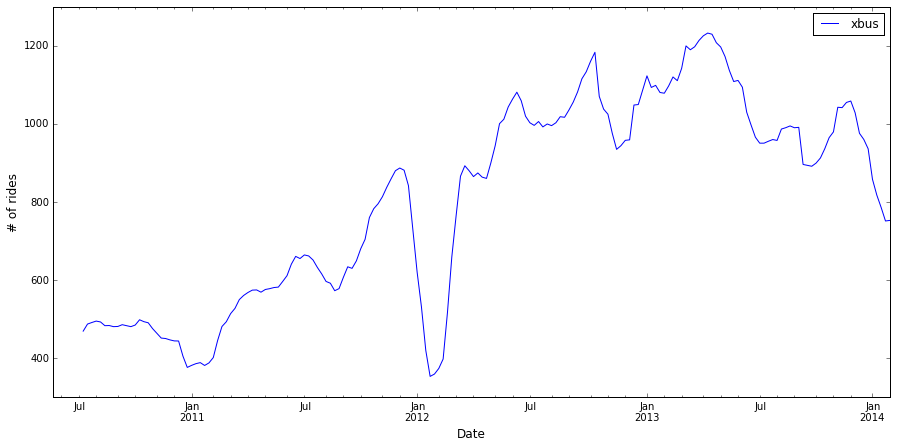

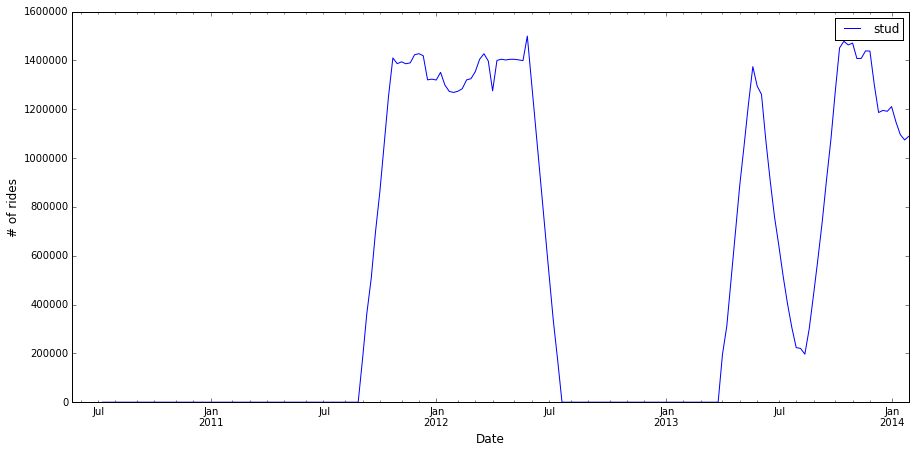

In [18]:
#Ploting all 23 types of MTA Cards time series suing a rollin mean 
# to smooth the time series
for column in mta_allsumdf1:
    ax = pd.rolling_mean(mta_allsumdf1, 8).plot(y=column, figsize=(15,7))
    ax.set_xlabel("Date", fontsize = 12)
    ax.set_ylabel("# of rides", fontsize = 12)

Given the plots of the time series and using visual inspection, we can estimate that the times series with the most prominent downwoards trends are:

- The time series for the ADA Farecard access system
- The express datacard
- The EZ pay
- The monthly metrocard
    

In [19]:
# Calculating threadsholds for all columns and locating siginificant events 
for column in mta_allsumdf1:
    
    print("For card " + str(column))
    print("Mean:" + str(mta_allsumdf1[column].mean()))
    print("Standard deviation:" + str(mta_allsumdf1[column].std()))
    print("Thresholds")
    thresholds = [mta_allsumdf1[column].mean() + 3*mta_allsumdf1[column].std(), 
              mta_allsumdf1[column].mean() - 3*mta_allsumdf1[column].std()]
    print thresholds
    print("Events Detected:")
    print(mta_allsumdf1[column].loc[(mta_allsumdf1[column]<thresholds[1])])
    print('____________________________________________________________________')

For card 10t
Mean:13242372.9691
Standard deviation:1215646.4611
Thresholds
[16889312.352366973, 9595433.585777357]
Events Detected:
2012-10-21    2331726
Freq: W-SUN, Name: 10t, dtype: float64
____________________________________________________________________
For card 14d
Mean:627910.731959
Standard deviation:90866.0875201
Thresholds
[900508.9945189294, 355312.46939859627]
Events Detected:
2012-10-21    106099
Freq: W-SUN, Name: 14d, dtype: float64
____________________________________________________________________
For card 1d
Mean:56311.2731959
Standard deviation:7618.88909549
Thresholds
[79167.94048233709, 33454.6059094155]
Events Detected:
2012-10-21    10203
Freq: W-SUN, Name: 1d, dtype: float64
____________________________________________________________________
For card 2t
Mean:187206.608247
Standard deviation:17636.1042886
Thresholds
[240114.92111317877, 134298.29538166657]
Events Detected:
2012-10-21    34900
Freq: W-SUN, Name: 2t, dtype: float64
____________________________

After the event analysis performed, we can confirm that for most of the series in the MTA cube, the most siginificant event detected using a >3-sigma threadshold was caused by Hurricane Sandy on October of 2012.

In [20]:
# Adding all values in the cube on the cards axis with Numpy NaN
mta_allsum1 = np.nansum(mta, axis=1)

In [21]:
#Validating the shape of the new array
mta_allsum1.shape

(600L, 194L)

In [22]:
# creating a Panda dataframe with the new array and transposing it
mta_allsumstations = pd.DataFrame(mta_allsum1).transpose()

In [23]:
#Validating the size of the new dataframe
mta_allsumstations.shape

(194, 600)

In [24]:
#Validating the head of resulting dataframe
mta_allsumstations.head()

0      1     2      3      4      5      6      7      8       9   ...   \
0  126878  37306  6606  16378  18564  19987  12449  11091  10482  147187 ...    
1  149477  46464  6881  17408  19903  20625  13644  11659  11030  154826 ...    
2  152383  49359  7229  17595  19948  21225  13719  12037  10881  155958 ...    
3  160175  44849  5731  14242  16076  17412  11460   9809   9123  154914 ...    
4  162641  41509  7032  17589  20283  20909  14094  11944  10923  157628 ...    

   590  591  592  593  594  595  596  597  598  599  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0    0  

[5 rows x 600 columns]

In [25]:
#Validating the head of resulting dataframe
mta_allsumstations.tail()

0    1     2      3      4      5      6      7      8       9   ...   \
189  69881    0  7343  20604  20560  22793  14107  13268  11714  190393 ...    
190  79550    0  7743  21370  21942  24354  15079  13539  12594  203532 ...    
191  78901    0  8171  22459  23283  25818  15602  15251  13188  205508 ...    
192  74591    0  7907  22773  22987  25499  15361  15259  13089  193804 ...    
193  76833    0  6790  19033  21562  23341  14211  12294  12489  207511 ...    

     590  591  592  593  594  595  596  597  598  599  
189    0    0    0    0    0    0    0    0    0    0  
190    0    0    0    0    0    0    0    0    0    0  
191    0    0    0    0    0    0    0    0    0    0  
192    0    0    0    0    0    0    0    0    0    0  
193    0    0    0    0    0    0    0    0    0    0  

[5 rows x 600 columns]

In [28]:
#Defining parametr of periods and applying fourer into the data with absolute value
N = len(mta_allsumstations)
f = np.abs(np.fft.rfft(mta_allsumstations))

In [30]:
#Calculationg the function of frecuency for the x axis of the plots
a = np.fft.rfftfreq(N, 1.0)

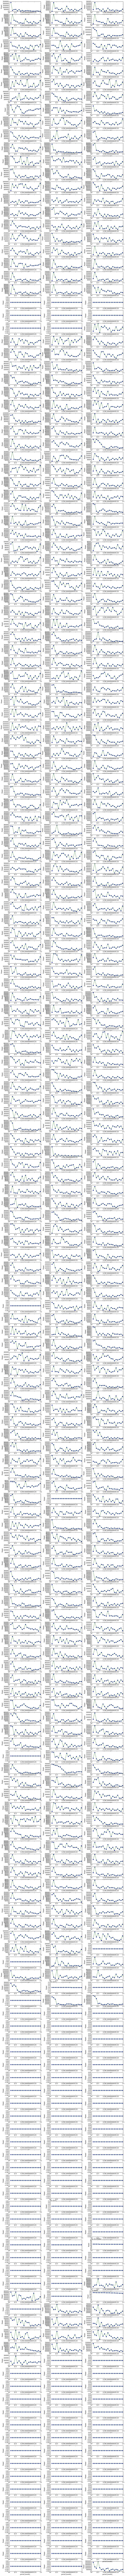

In [41]:
#Plotting the data for the 600 stations
fig = pl.figure(figsize=(15,300))

for column in mta_allsumstations:
    f = np.abs(np.fft.rfft(mta_allsumstations[column]))
    ax = fig.add_subplot(200,3,column)
    ax.plot(np.fft.rfftfreq(N, 1)[1:], (f)[1:], 'o', ms = 6)
    ax.plot(np.fft.rfftfreq(N, 1)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/10)
    pl.xlabel("period (month)")
    pl.ylabel("Power")
    pl.subplots_adjust(wspace=.3, hspace=.3, left=.1, right=.9, top=1, bottom=.1)
    ax.set_xticklabels([ "%s"%(1/4./f) for f in ax.get_xticks()])


It seems like the peak in the yearly usage for the subway station is near the end of each year and the begging of the next year, and could be explained by the weather conditions (Winter), that forces people to find shelter in the subway to avoid the cold and the snow in the street during the winter.